In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

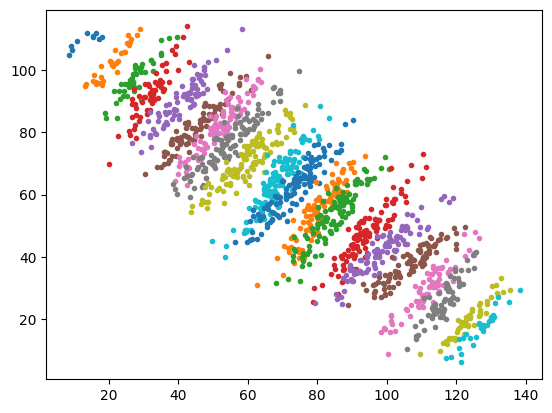

In [3]:
groups = []
all_x = []
n_groups = 20
maxi = 120
for i in range(n_groups):
    cx = np.random.rand()*(0.8*maxi/n_groups) + (maxi/n_groups)*i + 0.1*maxi
    cy = maxi - 0.8*cx + np.random.randn()*0.5
    r = 1+5*i*(n_groups-i)/(n_groups**2)
    theta = np.pi/3.5 + np.random.randn()*0.1
    n = i*(n_groups-i) + 10
    x = np.random.randn(n, 2)
    x[:,0] *= 5
    x *= r
    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]).T
    x = x.dot(R)
    x[:,0] += cx
    x[:,1] += cy

    group = {"cx": cx, "cy": cy, "r": r, "theta": theta, "n": n, "x": x}
    # print(group)
    groups.append(group)

    plt.plot(x[:,0], x[:,1], '.')
    all_x.append(x)
plt.show()

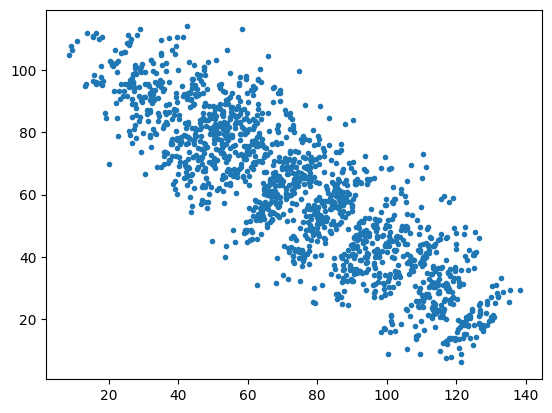

In [5]:
X = np.concatenate(all_x, axis=0)
plt.plot(X[:,0], X[:,1], '.')
plt.show()

y = -0.70072x + 112.97


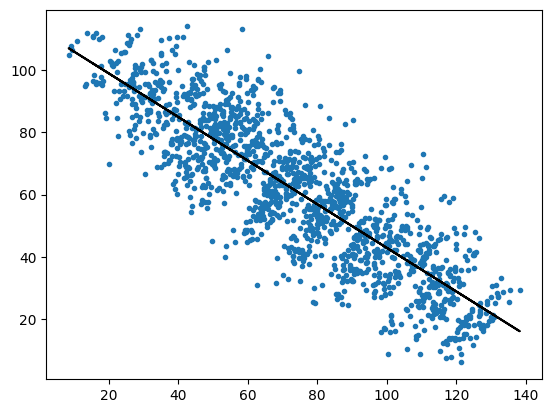

In [6]:
# perform a linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X[:,0].reshape(-1,1), X[:,1])
a = lr.coef_[0]
b = lr.intercept_
print(f"y = {a:0.5f}x + {b:0.2f}")
plt.plot(X[:,0], X[:,1], '.')
plt.plot(X[:,0], lr.predict(X[:,0].reshape(-1,1)), 'k')
plt.show()

y = 1.1407x + -19.034


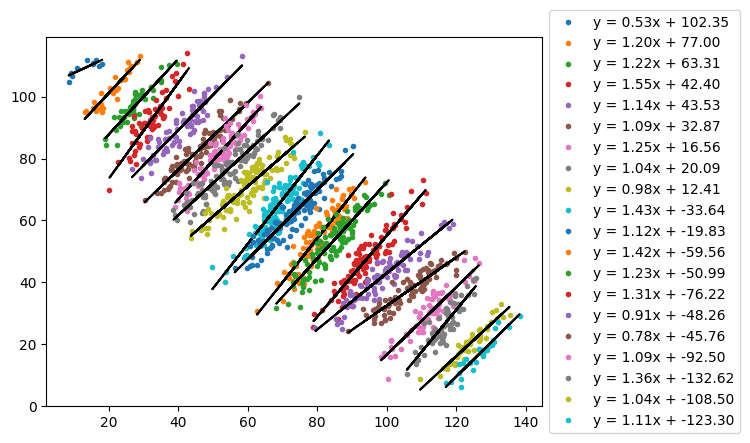

In [7]:
# perform a linear regression on each group
a_s = []
b_s = []
for group in groups:
    lr = LinearRegression()
    lr.fit(group["x"][:,0].reshape(-1,1), group["x"][:,1])
    # print(lr.coef_, lr.intercept_)
    a = lr.coef_[0]
    b = lr.intercept_
    a_s.append(a)
    b_s.append(b)
    plt.plot(group["x"][:,0], group["x"][:,1], '.', label=f"y = {a:0.2f}x + {b:0.2f}")
    plt.plot(group["x"][:,0], lr.predict(group["x"][:,0].reshape(-1,1)), 'k')
a_avg = np.mean(a_s)
b_avg = np.mean(b_s)
print(f"y = {a_avg:0.4f}x + {b_avg:0.3f}")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()